## YOLO V5

In [1]:
#!python -m pip install --upgrade pip

#!pip install tensorflow==2.3.1 

#!pip install tensorboard==2.4.1
!pip install torch 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch # YOLOv5 implemented using pytorch

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from IPython.display import Image #this is to render predictions

In [5]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [6]:
%cd /content/yolov5

/content/yolov5


In [7]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Divide the dataset in train and val folder. 

In [8]:
%cd /content/yolov5


/content/yolov5


# Create dataset.yaml

### move the dataset’s dataset.yaml file to the /content/yolov5/data directory. 
### This file contains information required by YOLO to train the model on the custom data. 

![image.png](attachment:image.png)

In [9]:
!python train.py --img 415 --batch 32 --epochs 30 --data dataset.yaml --weights yolov5l.pt --cache

train: weights=yolov5l.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-48-g5f8054c Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

## At the end of the training, two files should be saved in yolov5/runs/train/exp/weights: last.pt and best.pt. We’ll use best.pt.

## Explore the metrics recorded during training, I suggest you use TensorBoard, a very interactive exploration tool:

## Let’s explore now how confident our model is. We can plot a validation batch obtained during training and inspect the confidence score of each label

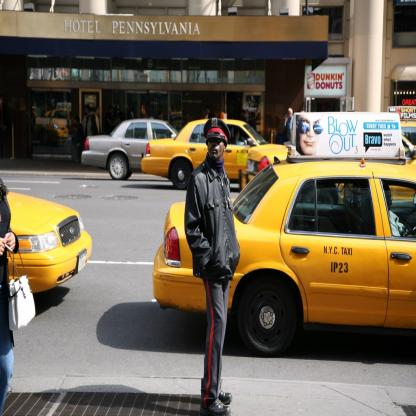

In [14]:
Image(filename= '/content/drive/MyDrive/happy_monk/New folder/happy monk/data/valid/images/image_000001240_jpg.rf.9617dc81c6e26819e3a9b3a5a6732cd5.jpg', width=1000)


Training losses and performance metrics are also logged to Tensorboard and a custom results.txt logfile which is plotted as results.png (below) after training completes. 

You’ll be implementing the detect.py script with the best.pt weights and image dimensions of 416x416 pixels (it’s really important to comply with that). The results will be saved to runs/detect/exp. To display the results, run the following code:

In [11]:
# lets find the bounding boxes

In [17]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python detect.py --source '/content/drive/MyDrive/happy_monk/New folder/happy monk/data/valid/images/image_000001240_jpg.rf.9617dc81c6e26819e3a9b3a5a6732cd5.jpg' --weights /content/yolov5/runs/train/exp6/weights/best.pt --conf 0.25

detect: weights=['/content/yolov5/runs/train/exp6/weights/best.pt'], source=/content/drive/MyDrive/happy_monk/New folder/happy monk/data/valid/images/image_000001240_jpg.rf.9617dc81c6e26819e3a9b3a5a6732cd5.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-48-g5f8054c Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 267 layers, 46113663 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /content/drive/MyDrive/happy_monk/New folder/happy monk/data/valid/images/image_000001240_jpg.rf.9617dc81c6e26819e3a9b3a5a6732cd5.jpg: 640x640 5 persons, 4 vehicles, 52.5ms
Speed: 0.6ms pre-process, 52.5m

In [13]:
# Model has detected the image " 3 persons, 10 vehicles,"

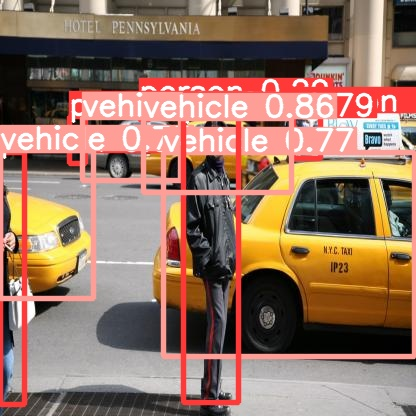

In [18]:
Image(filename= '/content/yolov5/runs/detect/exp5/image_000001240_jpg.rf.9617dc81c6e26819e3a9b3a5a6732cd5.jpg', width=1000)

